In [1]:
#Importation des modules

import tensorflow as tf 
import numpy as np

#--------------------------------------------
# Description du modèle
#--------------------------------------------

# Création d'un réseau multicouches
MonReseau = tf.keras.Sequential()

# C1: description de la couche de convolution
MonReseau.add(tf.keras.layers.Conv2D(
    filters = 32, #6 noyaux de convolutions
    kernel_size = (3, 3), #noyau de convolutions de 3x3
    strides = (1, 1),
    activation = 'relu',
    input_shape = (28, 28, 1),
    padding = 'same'))

# C2: description de la couche de convolution
MonReseau.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
    padding = 'same'))

# P1: Description de la couche de pooling (Max)
MonReseau.add(tf.keras.layers.MaxPool2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = 'valid'))

# C3: description de la couche de convolution
MonReseau.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
    padding = 'same'))

# C4: description de la couche de convolution
MonReseau.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
    padding = 'same'))

# P2: Description de la couche de pooling (Max)
MonReseau.add(tf.keras.layers.MaxPool2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = 'valid'))

# C5: description de la couche de convolution
MonReseau.add(tf.keras.layers.Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
    padding = 'same'))

# P3: Description de la couche de pooling (Max)
MonReseau.add(tf.keras.layers.MaxPool2D(
    pool_size = (3, 3),
    strides = (2, 2),
    padding = 'valid'))

MonReseau.add(tf.keras.layers.Flatten())

# Création d'une couche de 128 neurones avec fonction d'activation Relu
MonReseau.add(tf.keras.layers.Dense(128, activation='relu'))

# FC6: connexion totale avec couche de 200 neurones avec fct d'activation Relu
MonReseau.add(tf.keras.layers.Dense(200, activation='relu'))

# Sortie: 10 neurones avec fct d'activation Softmax
MonReseau.add(tf.keras.layers.Dense(10, activation='softmax'))

# Affichage du descriptif du réseau
MonReseau.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [2]:
#----------------------------------------------------------------------------
# Chargement des données d'apprentissage et de tests
#----------------------------------------------------------------------------
# Chargement en mémoire de la base de données des caractères MNIST
#  => tableaux de type ndarray (Numpy) avec des valeur entières
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#----------------------------------------------------------------------------
# Changements de format pour exploitation
#----------------------------------------------------------------------------
# les valeurs associées aux pixels sont des entiers entre 0 et 255
#  => transformation en valeurs réelles entre 0.0 et 1.0
x_train, x_test = x_train / 255.0, x_test / 255.0
# Les données en entrée sont des matrices de pixels 28x28
#  => transformation en matrices 28x28 sur 1 plan en profondeur
#     (format en 4D nécessaire pour pouvoir réaliser des convolutions (conv2D))
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)
# Les données de sortie sont des entiers associés aux chiffres à identifier
#  => transformation en vecteurs booléens pour une classification en 10 valeurs
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
#----------------------------------------------------------------------------
# COMPILATION du réseau 
#  => configuration de la procédure pour l'apprentissage
#----------------------------------------------------------------------------
MonReseau.compile(optimizer='adam',                # algo d'apprentissage
                  loss='categorical_crossentropy', # mesure de l'erreur
                  metrics=['accuracy'])            # mesure du taux de succès


In [4]:
#----------------------------------------------------------------------------
# APPRENTISSAGE du réseau
#  => calcul des paramètres du réseau à partir des exemples
#----------------------------------------------------------------------------
hist=MonReseau.fit(x=x_train, # données d'entrée pour l'apprentissage
                   y=y_train, # sorties désirées associées aux données d'entrée
                   epochs=10, # nombre de cycles d'apprentissage 
                   batch_size=128, # taille des lots pour l'apprentissage
                   validation_data=(x_test,y_test)) # données de test

Epoch 1/10
469/469 [==============================] - 316s 664ms/step - loss: 0.1991 - accuracy: 0.9353 - val_loss: 0.0396 - val_accuracy: 0.9866
Epoch 2/10
469/469 [==============================] - 313s 667ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 3/10
469/469 [==============================] - 324s 690ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 362s 772ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0241 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 323s 687ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 324s 692ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0225 - val_accuracy: 0.9934
Epoch 7/10
469/469 [==============================] - 315s 671ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0319 -

In [5]:
#----------------------------------------------------------------------------
# EVALUATION de la capacité à généraliser du réseau
#  => test du réseau sur des exemples non utilisés pour l'apprentissage 
#----------------------------------------------------------------------------
print()
perf=MonReseau.evaluate(x=x_test, # données d'entrée pour le test
                        y=y_test) # sorties désirées pour le test
print("Taux d'exactitude sur le jeu de test: {:.2f}%".format(perf[1]*100))


313/313 [==============================] - 15s 49ms/step - loss: 0.0345 - accuracy: 0.9888
Taux d'exactitude sur le jeu de test: 98.88%


In [6]:
import matplotlib.pyplot as plt 

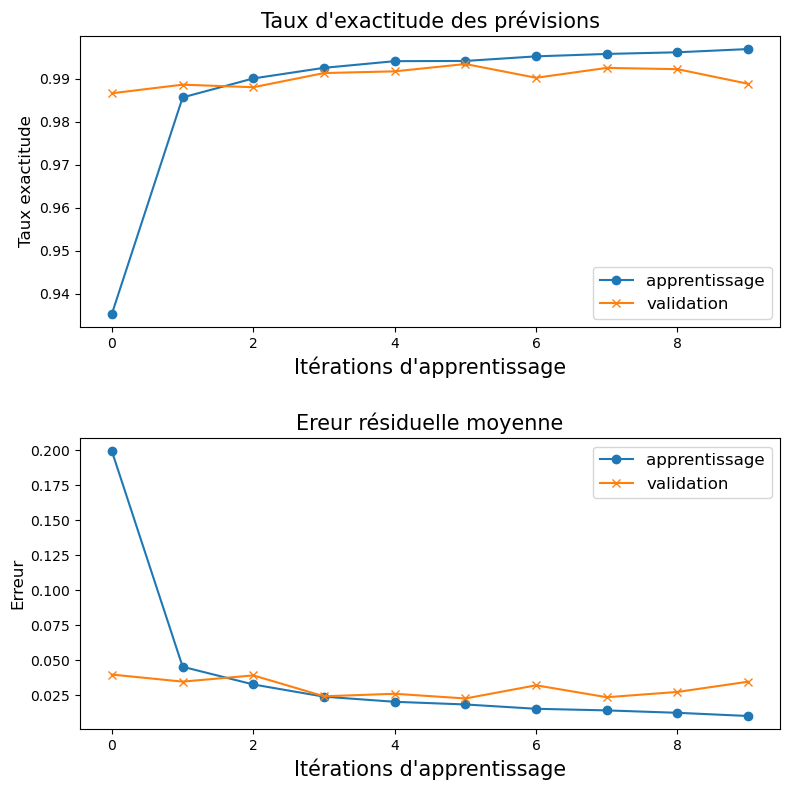

313/313 [==============================] - 16s 50ms/step - loss: 0.0345 - accuracy: 0.9888
Taux d'exactitude sur le jeu de test: 98.88%


In [7]:
#------------------------------------------------------------
# Affichage des graphiques d'évolutions de l'apprentissage
#------------------------------------------------------------
# création de la figure ('figsize' pour indiquer la taille)
plt.figure(figsize=(8,8))
# evolution du pourcentage des bonnes classifications
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'],'o-')
plt.plot(hist.history['val_accuracy'],'x-')
plt.title("Taux d'exactitude des prévisions",fontsize=15)
plt.ylabel('Taux exactitude',fontsize=12)
plt.xlabel("Itérations d'apprentissage",fontsize=15)
plt.legend(['apprentissage', 'validation'], loc='lower right',fontsize=12)
# Evolution des valeurs de l'erreur résiduelle moyenne
plt.subplot(2,1,2)
plt.plot(hist.history['loss'],'o-')
plt.plot(hist.history['val_loss'],'x-')
plt.title('Ereur résiduelle moyenne',fontsize=15)
plt.ylabel('Erreur',fontsize=12)
plt.xlabel("Itérations d'apprentissage",fontsize=15)
plt.legend(['apprentissage', 'validation'], loc='upper right',fontsize=12)
# espacement entre les 2 figures
plt.tight_layout(h_pad=2.5)
plt.show()

# performances du réseau sur les données de tests
perf=MonReseau.evaluate(x=x_test, y=y_test)
print("Taux d'exactitude sur le jeu de test: {:.2f}%".format(perf[1]*100))

FIABILITE DU RESEAU:
313/313 [==============================] - 16s 49ms/step - loss: 0.0345 - accuracy: 0.9888
Taux d'exactitude sur le jeu de test: 98.88%
==> 112  erreurs de classification !
==> 9888  bonnes classifications !
1/1 [==============================] - 0s 35ms/step


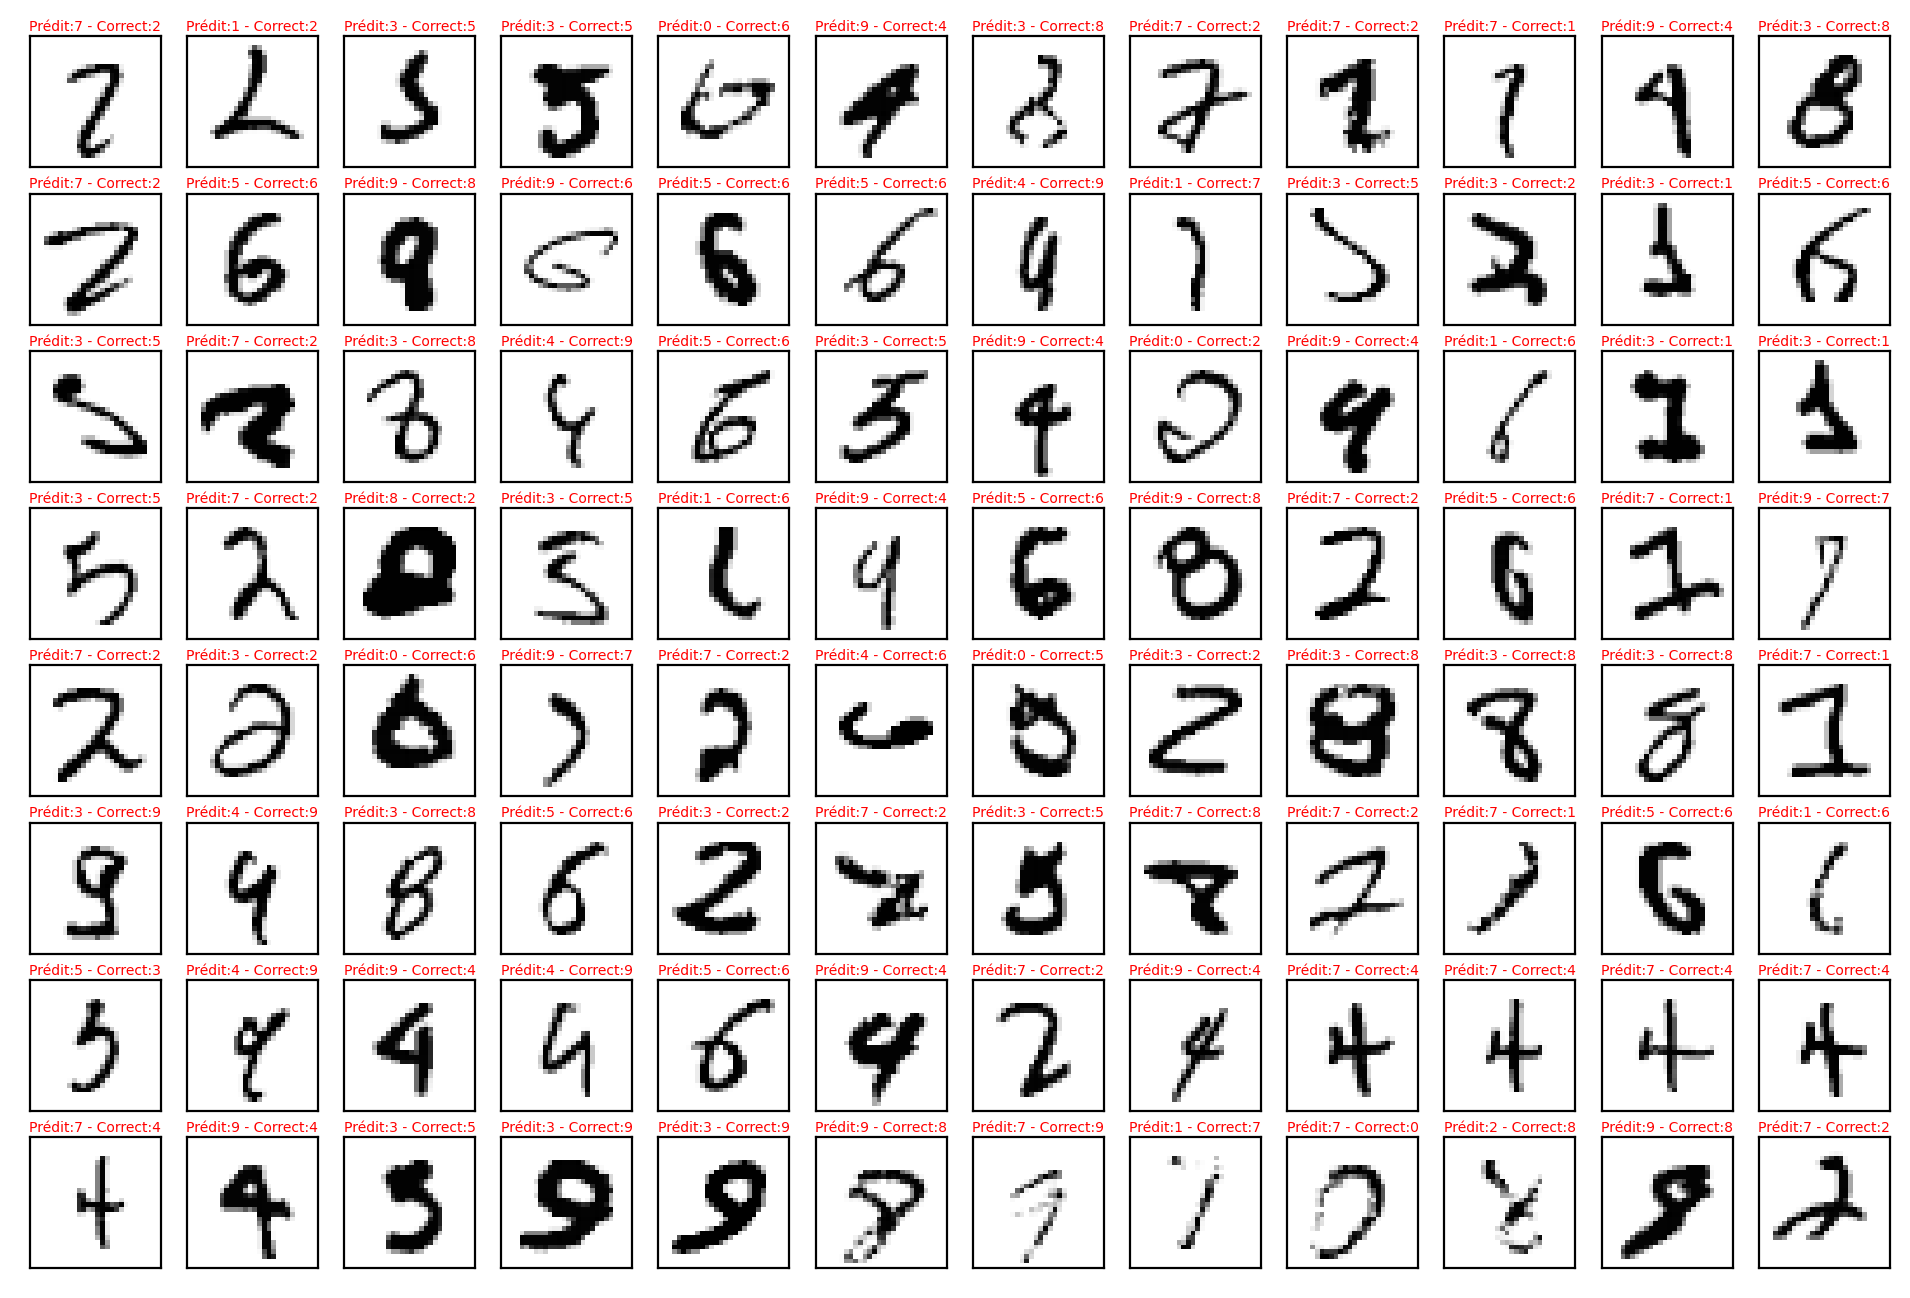

In [8]:
#----------------------------------------------------------------------------
# EXPLOITATION du réseau
#  => affichage des exemples de caractères bien et mal reconnus
#----------------------------------------------------------------------------
print('FIABILITE DU RESEAU:')
print('====================')
# Résultat du réseau avec des données de tests
perf=MonReseau.evaluate(x=x_test, # données d'entrée pour le test
                        y=y_test) # sorties désirées pour le test
print("Taux d'exactitude sur le jeu de test: {:.2f}%".format(perf[1]*100))
NbErreurs=int(10000*(1-perf[1]))
print("==>",NbErreurs," erreurs de classification !")
print("==>",10000-NbErreurs," bonnes classifications !")
# Calcul des prédictions du réseaux pour l'ensemble des données de test
Predictions=MonReseau.predict(x_test)
# Affichage des caractères bien/mal reconnus avec une matrice d'images
i=-1
Couleur='Red' # à remplacer par 'Green' pour les bonnes reconnaissances
plt.figure(figsize=(12,8), dpi=200)
for NoImage in range(12*8):
    i=i+1
    # '!=' pour les bonnes reconnaissances, '==' pour les erreurs
    while y_test[i].argmax() == Predictions[i].argmax(): i=i+1
    plt.subplot(8,12,NoImage+1)
    # affichage d'une image de digit, en format niveau de gris
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys', interpolation='none')
    # affichage du titre (utilisatin de la méthode format du type str)
    plt.title("Prédit:{} - Correct:{}".format(MonReseau.predict(
                        x_test[i:i+1])[0].argmax(),y_test[i].argmax()),
                        pad=2,size=5, color=Couleur)
    # suppression des graduations sur les axes X et Y
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
# Affichage de la figure
plt.show()

In [15]:
# Fonction pour ajouter du bruit à une image
def add_noise(image, noise_factor):
    noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    noisy_image = np.clip(noisy_image, 0.0, 1.0)
    return noisy_image

# Paramètres
noise_factor = 0.2  # Niveau de bruit (ajustez selon vos besoins)

# Création de la base de test bruitée
x_test_noisy = np.zeros_like(x_test)
for i in range(len(x_test)):
    x_test_noisy[i] = add_noise(x_test[i], noise_factor)


In [16]:
# Prétraitement des données de test bruitées
x_test_noisy = x_test_noisy.reshape(-1, 28, 28, 1)

# Évaluation du réseau sur les données de test bruitées
perf_noisy = MonReseau.evaluate(x=x_test_noisy, y=y_test)
print("Taux d'exactitude sur le jeu de test bruité : {:.2f}%".format(perf_noisy[1]*100))


313/313 [==============================] - 16s 50ms/step - loss: 0.0885 - accuracy: 0.9751
Taux d'exactitude sur le jeu de test bruité : 97.51%
